# TRAVAUX PRATIQUES GROUPE 6 K-MEANS: Prédiction du cancer de sein

# 1- Formulation d'une solution 
&emsp;&emsp;Pour aborder ce problème de classification sur le cancer du sein, l'utilisation d'un modèle basé sur l'algorithme K-means pourrait être envisagée pour assigner efficacement les patients aux catégories de témoins sains ou de patientes atteintes de cancer du sein, en se basant sur leurs caractéristiques cliniques.

# 2- Collecte des données
&emsp;&emsp;Nous avons recueilli le dataset sur kaggle: https://www.kaggle.com/datasets/tanshihjen/coimbra-breastcancer/data
    
&emsp;&emsp;Cet ensemble de données présente une exploration complète des caractéristiques cliniques observées ou mesurées chez 64 patientes atteintes d'un cancer du sein et 52 témoins sains. L'ensemble de données comprend à la fois des attributs quantitatifs et des étiquettes correspondantes pour une analyse et une modélisation efficaces.

**Attributs quantitatifs :**

- **Âge (années):** Âge des individus.
- **IMC (kg/m²):** Indice de masse corporelle, une mesure de la graisse corporelle basée sur le poids et la taille.
- **Glucose (mg/dL):** Glycémie, un indicateur métabolique important.
- **Insuline (µU/mL):** Taux d'insuline, une hormone liée à la régulation du glucose.
- **HOMA:** Homeostatic Model Assessment, une méthode d’évaluation de la résistance à l’insuline et de la fonction des cellules bêta.
- **Leptine (ng/mL):** Taux de leptine, une hormone impliquée dans la régulation de l'appétit et de l'équilibre énergétique.
- **Adiponectine (µg/mL):** Taux d'adiponectine, une protéine associée à la régulation métabolique.
- **Résistine (ng/mL):** Niveaux de résistine, une protéine impliquée dans la résistance à l'insuline.
- **MCP-1 (pg/dL):** Monocyte Chemoattractant Protein-1, une cytokine impliquée dans l'inflammation.

**Étiquettes:**

- **1 :** Témoins sains
- **2 :** Patientes atteintes d’un cancer du sein



# 3-Prétraitement des données 
## Importation des bibliothèques


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
#from kneed import KneeLocator 
#import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Chargement du dataset
data=pd.read_csv('Coimbra_breast_cancer_dataset.csv')

In [6]:
# Ouverture du dataset
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [7]:
#Exploration des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [8]:
print(data.describe())

              Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    

In [10]:
# Visualisation des valeurs manquantes
#msno.matrix(data)

In [11]:
# Supprimer les duplications
data = data.drop_duplicates()

# Supprimer les colonnes avec des valeurs manquantes
data = data.dropna(axis=1)


NameError: name 'sns' is not defined

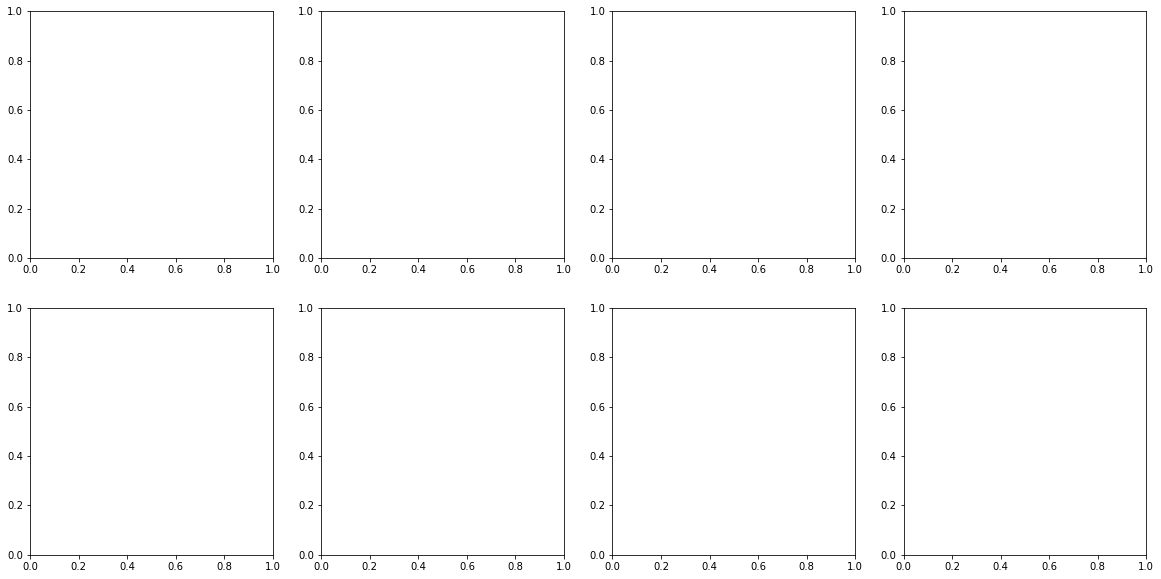

In [12]:
import numpy as np
from scipy.stats import norm

# Examinez la distribution des variables continues avec la courbe de la loi normale
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, variable in enumerate(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin']):
    sns.histplot(data[variable], kde=True, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Histogramme de {variable}')
plt.tight_layout()
plt.show()


In [44]:
data.shape

(116, 10)

In [50]:
#obtenir les centroid initiaux
centroids=data.sample(n=3).values
print(centroids)

[[ 60.          31.23140988 131.          30.13         9.73600733
   37.843        8.40443     11.50005    396.021        2.        ]
 [ 77.          25.9         85.           4.58         0.96027333
   13.74         9.75326     11.774      488.829        1.        ]
 [ 51.          27.68877813  77.           3.855        0.732193
   20.092        3.19209     10.37518    473.859        1.        ]]


In [27]:
def euclidianDistance(point1,point2):
    return np.sqrt(np.sum((point1-point2)**2))

In [34]:
def calculateDistanceCentroid(data,centroids):
    distances=[]
    for centroid in centroids:
        distances.append(np.array([euclidianDistance(point,centroid) for point in data.values]))
    return np.array(distances)

In [40]:
def assignNearestCluster(distances):
    return np.argmin(distances,axis=0)

In [46]:
def updateCentroids(data,clusters,numCluster,centroids):
    newCentroids=[]
    for clusterIndex in range(numCluster):
        clusterPoints=data[clusters==clusterIndex]
        if(len(clusterPoints)>0):
            newCentroid=np.mean(clusterPoints,axis=0)
            newCentroids.append(newCentroid)
        else:
            newCentroid.append(centroids[clusterIndex])
    return np.array(newCentroids)

In [56]:
clusters=assignNearestCluster(calculateDistanceCentroid(data,centroids))
print(updateCentroids(data,clusters,len(centroids),centroids))

[[ 59.07407407  26.50624923  97.14814815   9.08583333   2.29115556
   27.46786111  11.4222675   12.42255722 264.75407407   1.57407407]
 [ 56.07142857  28.70820371  99.64285714  10.74275      3.10084337
   26.44204821   8.96584527  17.36368    803.08641071   1.53571429]
 [ 52.83333333  26.75466498  86.33333333  11.52883333   2.54148807
   20.55501667  10.3486      10.83797833 458.24883333   1.5       ]]


3

In [104]:
class Kmeans:
    """
    Implémentation de l'algorithme de clustering K-Means.

    Paramètres:
        K (int): Nombre de clusters

    Attributs:
        K (int): Nombre de clusters
        centroids (numpy.ndarray): Tableau contenant les centroids de chaque cluster

    Méthodes:
        __init__(self, K): Initialise l'instance Kmeans avec le nombre spécifié de clusters.
        initialize_centroids(self, X): Initialise les centroids pour chaque cluster en sélectionnant K points aléatoires du jeu de données.
        assign_points_centroids(self, X): Assignent chaque point du jeu de données au centroid le plus proche.
        compute_mean(self, X, points): Calcule la moyenne des points assignés à chaque centroid.
        fit(self, X, iterations=10): Effectue le clustering du jeu de données en utilisant l'algorithme K-Means.
        elbow(self, X, max_clusters=10): Utilise la méthode du coude pour trouver le nombre optimal de clusters.
        plot_clusters(self, X, assigned_points): Affiche le jeu de données avec les clusters assignés.
        evaluation(self, X, assigned_points): Évalue la performance du modèle en utilisant des métriques appropriées.
        inertia(self, X, assigned_points): Calcule l'inertie (somme des carrés des distances intra-cluster).

    """
    
    def __init__(self, K):
        """
        ETAPE #1
        Initialise l'instance Kmeans avec le nombre spécifié de clusters.
        Paramètres:
            K (int): Nombre de clusters
        """
        self.K=K
        #pass

    def initialize_centroids(self, X):
        """
        ETAPE #2
        Initialise les centroids au travers du dataset.

        """
        self.centroids=X.sample(n=self.K).values
        #pass

    def assign_points_centroids(self, X): 
        """
        ETAPE #3
        Assignent chaque point du jeu de données au centroid le plus proche.
        """
       
        distances=[]
        for centroid in self.centroids:
            distances.append(np.array([euclidianDistance(point,centroid) for point in X.values]))
        return  np.argmin(np.array(distances),axis=0)

    def compute_mean(self, X, oldCluster):
        """
        ETAPE #4
        Calcule la moyenne des points assignés à chaque centroid et assigne assigne le nouveau centroid
        
        """
        newCentroids=[]
        for clusterIndex in range(len(self.centroids)):
            clusterPoints=X[oldCluster==clusterIndex]
            if(len(clusterPoints)>0):
                newCentroid=np.mean(clusterPoints,axis=0)
                newCentroids.append(newCentroid)
            else:
                newCentroid.append(centroids[clusterIndex])
        self.centroids=np.array(newCentroids)
        pass

    def fit(self, X, iterations=10):
        """
        ETAPE 5
        Effectue le clustering du jeu de données en utilisant l'algorithme K-Means.
        """
        self.initialize_centroids(X)
        #print(self.centroids)
        clusters=self.assign_points_centroids(X)
        #print(clusters)
        for i in range(iterations):#condition devrait lorsque le precedant cluster est egal au deuxieme
            if(i==iterations-2):
                print("precedent cluster")
                print(clusters)
            self.compute_mean(X,clusters)
            clusters=self.assign_points_centroids(X)
        print("final centroid")
        print(self.centroids)
        print("final cluster")
        print(clusters)

    @staticmethod
    def elbow(X, max_clusters=10):
        """
        Utilise la méthode du coude pour trouver le nombre optimal de clusters.
        Utilise la libraire kneed pour recuperer cette valeur 

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            max_clusters (int): Nombre maximal de clusters à considérer (par défaut=10)

        Retourne:
            List: Liste des inerties intra-cluster pour chaque nombre de clusters testé
        """
        pass

    def plot_clusters(self, X, assigned_points):
        """
        Affiche le jeu de données avec les clusters assignés.

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point
        """
        pass

    def evaluation(self, X, assigned_points):
        """
        Évalue la performance du modèle en utilisant des métriques appropriées.

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            float: Score d'évaluation
        """
        pass

    def inertia(self, X, assigned_points):
        """
        Calcule l'inertie (somme des carrés des distances intra-cluster).

        Paramètres:
            X (numpy.ndarray): Jeu de données à clusteriser
            assigned_points (numpy.ndarray): Tableau contenant l'indice du centroid pour chaque point

        Retourne:
            float: Valeur de l'inertie
        """
        pass


In [105]:
kmeans= Kmeans(3)

In [106]:
kmeans.fit(data)

precedent cluster
[1 1 2 2 2 2 0 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 0 2 2 0 2 2 2 2 1 2 1 2 2
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1
 1 2 1 2 0 2 2 1 2 2 0 0 0 0 0 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1
 1 1 1 1 1]
final centroid
[[  67.625        28.50333647  128.5          17.781         7.4323343
    30.4959125     7.56807625   26.91259375 1432.27775       1.625     ]
 [  59.14516129   26.42670875   95.82258065    9.15327419    2.26836289
    26.27707097   11.19478371   12.12393565  290.38432258    1.5483871 ]
 [  53.02173913   28.97917873   95.10869565    9.8185        2.44611704
    26.39573043    9.26869957   16.11363652  707.76091304    1.54347826]]
final cluster
[1 1 2 2 2 2 0 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 0 2 2 0 2 2 2 2 1 2 1 2 2
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1
 1 2 1 2 0 2 2 1 2 2 2 0 0 0 0 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1
 1 1 1 1 1]
